In [1]:
import warnings;
warnings.simplefilter('ignore')

# Install and Import Dependencies

In [9]:
import pandas as pd
from fbprophet import Prophet
import os

# Read in Data and Process Dates

In [10]:
os.chdir('/Users/ryangough/Desktop/TimeSeriesForecastingProphet')

In [11]:
df = pd.read_csv('dataset.csv')

In [12]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [13]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [14]:
print(df['Product'].unique())
print(df['Store'].unique())
# Ensure that we only have one value. These columns will ultimately be dropped. 

[2667437]
['QLD_CW_ST0203']


In [15]:
# Currently TimeDate columns are not dtypes appropiate. Time Date needs to be from int64 to TimeDate.
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [17]:
# Need to perform preprocesing to change Time Date.
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [18]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [21]:
# Ensure that new ds column has the correct date time
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [22]:
# Drop unecessary columns 
# axis=1, means to apply this to columns and not rows
# inplace=True, means to change the current dataset and not to create a new one. 
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [23]:
df.head() 

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# Train Model

In [24]:
# Train the model from the Prophet class.
# interval_width=0.95, means the confidence interval
# daily_seasonality=True, means that we included "Days", so it can parse through there
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

# Forecast Away

In [25]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.014918,725.474166,3953.676392,3042.014918,3042.014918,-641.038712,-641.038712,-641.038712,469.792305,...,16.635346,16.635346,16.635346,-1127.466363,-1127.466363,-1127.466363,0.0,0.0,0.0,2400.976206
1,2018-01-02,3042.763893,814.644552,3970.420792,3042.763893,3042.763893,-651.183101,-651.183101,-651.183101,469.792305,...,-11.268085,-11.268085,-11.268085,-1109.707321,-1109.707321,-1109.707321,0.0,0.0,0.0,2391.580792
2,2018-01-03,3043.512868,753.993668,4022.999500,3043.512868,3043.512868,-625.359730,-625.359730,-625.359730,469.792305,...,-4.396566,-4.396566,-4.396566,-1090.755469,-1090.755469,-1090.755469,0.0,0.0,0.0,2418.153138
3,2018-01-04,3044.261843,867.372695,3997.479095,3044.261843,3044.261843,-578.413553,-578.413553,-578.413553,469.792305,...,22.481778,22.481778,22.481778,-1070.687635,-1070.687635,-1070.687635,0.0,0.0,0.0,2465.848290
4,2018-01-05,3045.010818,825.387392,4093.846490,3045.010818,3045.010818,-614.421907,-614.421907,-614.421907,469.792305,...,-34.580721,-34.580721,-34.580721,-1049.633491,-1049.633491,-1049.633491,0.0,0.0,0.0,2430.588911


In [26]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4234.761230,2200.811363,5471.242829,4231.244582,4238.091312,-513.212960,-513.212960,-513.212960,469.792305,...,16.635346,16.635346,16.635346,-999.640611,-999.640611,-999.640611,0.0,0.0,0.0,3721.548270
1176,2021-03-23,4235.830779,2120.193076,5224.756174,4232.251892,4239.202140,-530.656794,-530.656794,-530.656794,469.792305,...,-11.268085,-11.268085,-11.268085,-989.181015,-989.181015,-989.181015,0.0,0.0,0.0,3705.173985
1177,2021-03-24,4236.900329,2071.083609,5243.998551,4233.283048,4240.312968,-516.103571,-516.103571,-516.103571,469.792305,...,-4.396566,-4.396566,-4.396566,-981.499311,-981.499311,-981.499311,0.0,0.0,0.0,3720.796758
1178,2021-03-25,4237.969878,2121.954593,5200.451449,4234.310603,4241.423797,-484.904793,-484.904793,-484.904793,469.792305,...,22.481778,22.481778,22.481778,-977.178875,-977.178875,-977.178875,0.0,0.0,0.0,3753.065085
1179,2021-03-26,4239.039427,2187.276315,5228.952039,4235.310425,4242.534418,-541.506539,-541.506539,-541.506539,469.792305,...,-34.580721,-34.580721,-34.580721,-976.718123,-976.718123,-976.718123,0.0,0.0,0.0,3697.532888


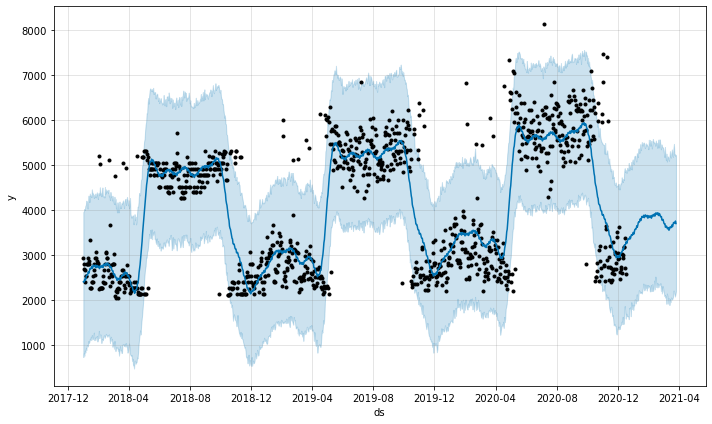

In [27]:
# Ploting the forecast
plotl = m.plot(forecast)

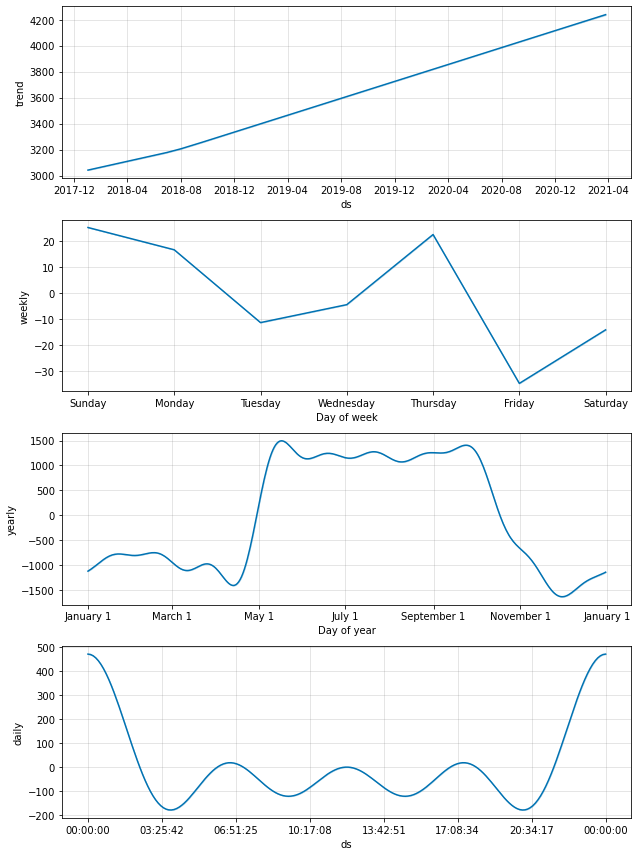

In [28]:
# Decomposing the dataset.
plot2 = m.plot_components(forecast)